In [1]:
import pandas as pd
df = pd.read_csv('BankNote.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [2]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [3]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
from sklearn.decomposition import PCA
pca = PCA(2)
target = df['class']
df = df.drop('class',axis=1)
data_pca = pca.fit_transform(df)
pca_df = pd.DataFrame(data_pca,columns=['PCA1','PCA2'])
pca_df.head()


,PCA1,PCA2
0,-8.117954,-2.372615
1,-7.800124,-2.689555
2,3.690195,-4.372720
3,-9.908612,-0.978030
4,6.957545,-0.733813


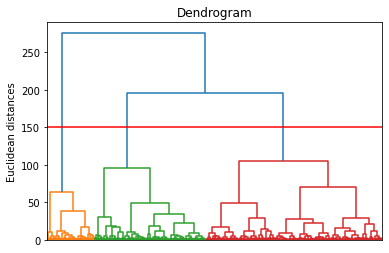

In [5]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
linkage = sch.linkage(pca_df, method  = "ward")
linkage
dendrogram = sch.dendrogram(linkage)
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.xticks([])
plt.axhline(y = 150, color = 'r')
plt.show()

### best numbers of cluster = 3

best k based on silhouette_score : 2


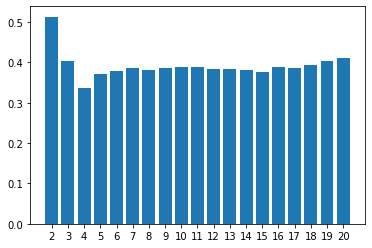

In [6]:
from sklearn.cluster import AgglomerativeClustering as AG
from sklearn.metrics import silhouette_score

x_ax = []
y_ax = []
for i in range(2,21):
    model = AG(n_clusters=i)
    labels = model.fit_predict(pca_df)
    score = silhouette_score(pca_df, labels)
    x_ax.append(i)
    y_ax.append(score)
bars = plt.bar(x=x_ax,height=y_ax,tick_label=range(2,21))
best_k_silhouette = y_ax.index(max(y_ax))+2
print("best k based on silhouette_score :",best_k_silhouette)

scatter plot of best k found by silhouette method


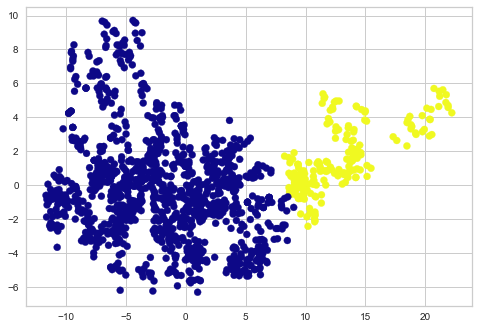

In [20]:
ag_cluster = AG(n_clusters=best_k_silhouette)
clusters_silhouette = ag_cluster.fit_predict(pca_df)
print("scatter plot of best k found by silhouette method")
sct_plt = plt.scatter(x=pca_df.to_numpy()[:,0],y=pca_df.to_numpy()[:,1],c=clusters_silhouette,cmap='plasma')

In [22]:
clusters = ag_cluster.labels_
for i in range(best_k_silhouette):
    print(pca_df.loc[clusters == i].describe())

              PCA1         PCA2
count  1177.000000  1177.000000
mean     -2.129894    -0.260123
std       4.903319     3.123009
min     -11.687152    -6.324861
25%      -5.910496    -2.321566
50%      -2.298854    -0.653849
75%       1.449887     1.173981
max       9.009732     9.711985
             PCA1        PCA2
count  195.000000  195.000000
mean    12.855822    1.570075
std      3.621376    1.921763
min      8.243889   -2.436129
25%      9.844256    0.155490
50%     12.038916    1.153322
75%     14.221714    3.162096
max     22.222044    5.697092


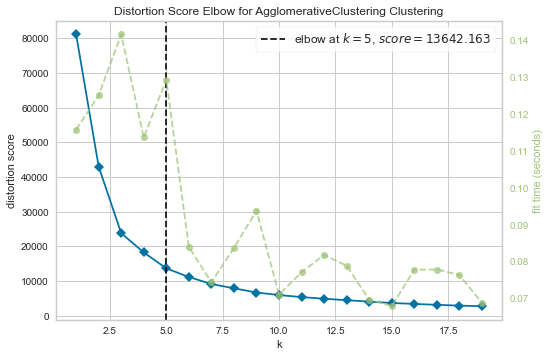

best k value based on elbow: 5


In [9]:
from yellowbrick.cluster import KElbowVisualizer

model = AG()
visualizer = KElbowVisualizer(model, k=(1,20))
visualizer.fit(pca_df) 
visualizer.show()  
best_k_elbow = visualizer.elbow_value_
print("best k value based on elbow:",best_k_elbow)

scatter plot of best k found by elbow method


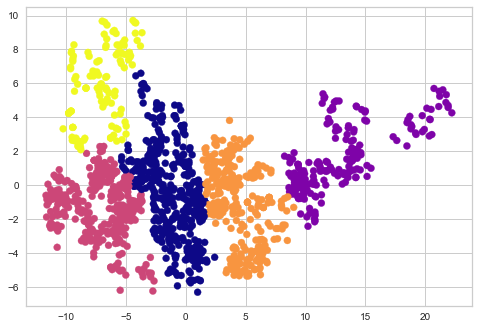

In [10]:
clusters_elbow = AG(n_clusters=best_k_elbow).fit_predict(pca_df)
print("scatter plot of best k found by elbow method")
sct_plt = plt.scatter(x=pca_df.to_numpy()[:,0],y=pca_df.to_numpy()[:,1],c=clusters_elbow,cmap='plasma')

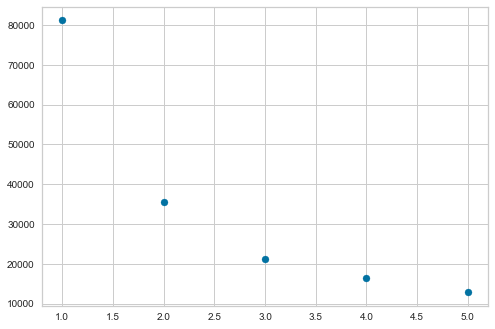

In [11]:
from sklearn.cluster import KMeans
x_ax=[]
y_ax=[]
for k in range(1,6):
    model = KMeans(n_clusters=k,n_init='auto')
    model.fit_predict(pca_df)
    y_ax.append(model.inertia_)
    x_ax.append(k)
plt.scatter(x_ax,y_ax)

,0,1
0,-33.646217,-13.040890
1,-30.356390,-16.035458
2,28.416306,-28.822254
3,-49.256432,2.372321
4,28.346794,-14.625205


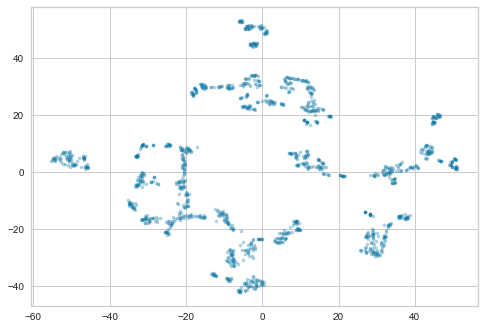

In [12]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
tsne_df = pd.DataFrame(tsne.fit_transform(df))
plt.scatter(tsne_df.to_numpy()[:,0],tsne_df.to_numpy()[:,1],alpha=0.3,s=10)
tsne_df.head()

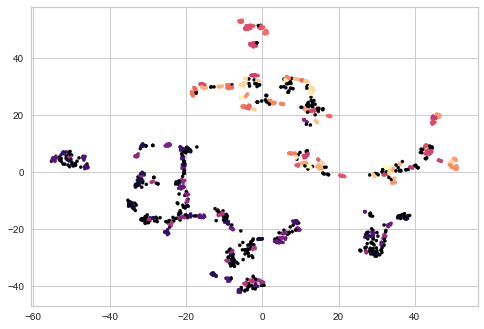

In [13]:
from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps=0.6,min_samples=4)
labels = dbs.fit_predict(tsne_df)
plt.scatter(tsne_df.to_numpy()[:,0],tsne_df.to_numpy()[:,1],c=labels,cmap='magma',s=10)

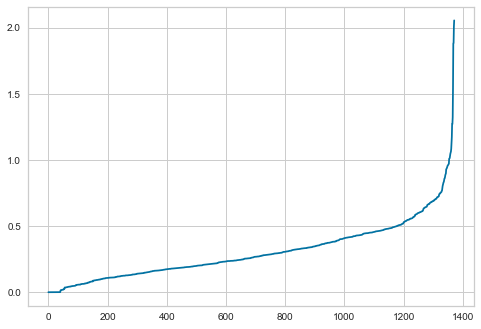

In [14]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
MinPts = 4
neighbors = NearestNeighbors(n_neighbors=MinPts)
neighbors_fit = neighbors.fit(tsne_df)
distances, indices = neighbors_fit.kneighbors(tsne_df)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

### based on the plot, we should search the space around 4 MinPts and 0.75 EPS

In [15]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
min_samples = range(1,10)
eps = np.arange(0.5,1.0, 0.05)
output = []
for ms in min_samples:
    for ep in eps:
        labels = DBSCAN(min_samples=ms, eps = ep).fit(tsne_df).labels_
        if len(np.unique(labels))==1:
            continue
        score = silhouette_score(tsne_df, labels)
        output.append((ms, ep, score))
min_samples, eps, score = sorted(output, key=lambda x:x[-1])[-1]
print(f"Best silhouette_score: {score}")
print(f"min_samples: {min_samples}")
print(f"eps: {eps}")

Best silhouette_score: 0.5042605996131897
min_samples: 3
eps: 0.9500000000000004


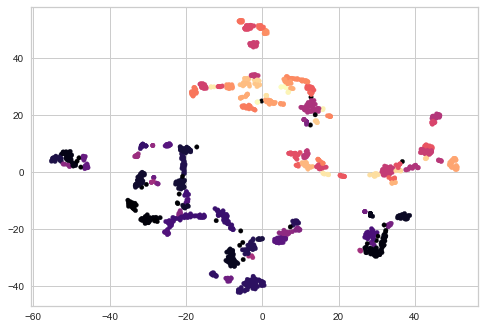

In [16]:
dbs = DBSCAN(eps=eps,min_samples=min_samples)
labels = dbs.fit_predict(tsne_df)
plt.scatter(tsne_df.to_numpy()[:,0],tsne_df.to_numpy()[:,1],c=labels,cmap='magma',s=20)